<a href="https://colab.research.google.com/github/akshaypat444/tensorflow_practice/blob/main/Neural_Network_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Cleanup

1. Convert categorical features into numbers using one hot encoding

In [69]:
insurance_encoded = pd.get_dummies(insurance)
insurance_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [71]:
X = insurance_encoded.drop('charges', axis=1)
y = insurance_encoded['charges']
X.shape, y.shape

((1338, 11), (1338,))

## Create training and testing sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 11) (268, 11) (1070,) (268,)


# Model 1

In [55]:
# Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
insurance_model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8612.1416 - mae: 8612.1416
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7688.9336 - mae: 7688.9336
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7587.7046 - mae: 7587.7046
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7700.3193 - mae: 7700.3193
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7624.2725 - mae: 7624.2725
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7771.5176 - mae: 7771.5176
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7884.0010 - mae: 7884.0010
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7561.5449 - mae: 7561.5449
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7468.9570 - mae: 7468.9570
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7444.7783 - mae: 7444.7783

# Evaluate the insurance model

In [56]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8100.2563 - mae: 8100.2563


[8100.25634765625, 8100.25634765625]

### Too much error in the model.. models needs to be tweaked further

## Model 2

In [57]:
tf.random.set_seed(42)

# Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(15),
    tf.keras.layers.Dense(1)
])

# Compile a model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=["mae"])

# Fit the model
insurance_model_2.fit(X_train, y_train, epochs=50)

Epoch 1/50
34/34 [==============================] - 1s 2ms/step - loss: 10366.4141 - mae: 10366.4141
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 7537.8740 - mae: 7537.8740
Epoch 3/50
34/34 [==============================] - 0s 2ms/step - loss: 7236.3530 - mae: 7236.3530
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 6909.6362 - mae: 6909.6362
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 6595.0508 - mae: 6595.0508
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: 6346.7998 - mae: 6346.7998
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 6227.3643 - mae: 6227.3643
Epoch 8/50
34/34 [==============================] - 0s 2ms/step - loss: 6037.2441 - mae: 6037.2441
Epoch 9/50
34/34 [==============================] - 0s 2ms/step - loss: 5826.6870 - mae: 5826.6870
Epoch 10/50
34/34 [==============================] - 0s 2ms/step - loss: 5593.3345 - mae: 5593.3345
Epoch 1

In [58]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3212.2725 - mae: 3212.2725


[3212.2724609375, 3212.2724609375]

# Model 3

In [64]:
tf.random.set_seed(42)

# Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(15),
    tf.keras.layers.Dense(1)
])

# Compile a model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.5),
                metrics=["mae"])

# Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=50)

Epoch 1/50
34/34 [==============================] - 1s 2ms/step - loss: 8091.1362 - mae: 8091.1362
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 5322.8203 - mae: 5322.8203
Epoch 3/50
34/34 [==============================] - 0s 2ms/step - loss: 4821.7241 - mae: 4821.7241
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 5053.5190 - mae: 5053.5190
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 3826.1274 - mae: 3826.1274
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 3867.8352 - mae: 3867.8352
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 4471.2236 - mae: 4471.2236
Epoch 8/50
34/34 [==============================] - 0s 2ms/step - loss: 4681.5317 - mae: 4681.5317
Epoch 9/50
34/34 [==============================] - 0s 2ms/step - loss: 4070.9878 - mae: 4070.9878
Epoch 10/50
34/34 [==============================] - 0s 2ms/step - loss: 3882.9302 - mae: 3882.9302
Epoch 11/

In [61]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 3303.0603 - mae: 3303.0603


[3303.060302734375, 3303.060302734375]

## Plot History / Loss Curve

Text(0.5, 0, 'epochs')

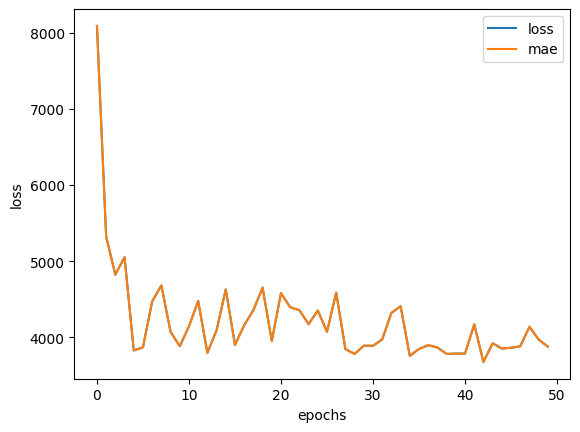

In [83]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Note** -> How long should the training be?
-> It depends on the problem at hand

1. EarlyStopping callback is there for help

## EarlyStopping callback


## Preprocessing Normalization and Standardization

1. Normalization - Scaling the features to common scale while preserving the distribution of data (MinMaxScaler in sklearn)
2. Standardization - Removes the mean and divides the each value by standard deviation (StandardScaler in sklearn)

In [73]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [74]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
X = insurance_encoded.drop('charges', axis=1)
y = insurance_encoded['charges']
X.shape, y.shape

((1338, 11), (1338,))

In [78]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["smoker", "region"])
)

# Create X & y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer on the training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler, OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [80]:
X_train_normal.shape, X_test_normal.shape

((1070, 9), (268, 9))

# Insurance model on Normalized data


In [93]:
tf.random.set_seed(42)

insurance_model_normalized = tf.keras.Sequential([
     tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(15),
    tf.keras.layers.Dense(1)
])

insurance_model_normalized.compile(loss=tf.keras.losses.mae,
                                   optimizer=tf.keras.optimizers.Adam(),
                                   metrics=["mae"])


history_2 = insurance_model_normalized.fit(X_train_normal, y_train, epochs=50)

Epoch 1/50
34/34 [==============================] - 1s 2ms/step - loss: 13344.0732 - mae: 13344.0732
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 13339.9238 - mae: 13339.9238
Epoch 3/50
34/34 [==============================] - 0s 2ms/step - loss: 13331.6719 - mae: 13331.6719
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 13315.8643 - mae: 13315.8643
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 13288.3018 - mae: 13288.3018
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 13244.6162 - mae: 13244.6162
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 13180.9336 - mae: 13180.9336
Epoch 8/50
34/34 [==============================] - 0s 2ms/step - loss: 13093.5898 - mae: 13093.5898
Epoch 9/50
34/34 [==============================] - 0s 2ms/step - loss: 12978.8574 - mae: 12978.8574
Epoch 10/50
34/34 [==============================] - 0s 2ms/step - loss: 12833.4727 - mae: 

Text(0.5, 0, 'epochs')

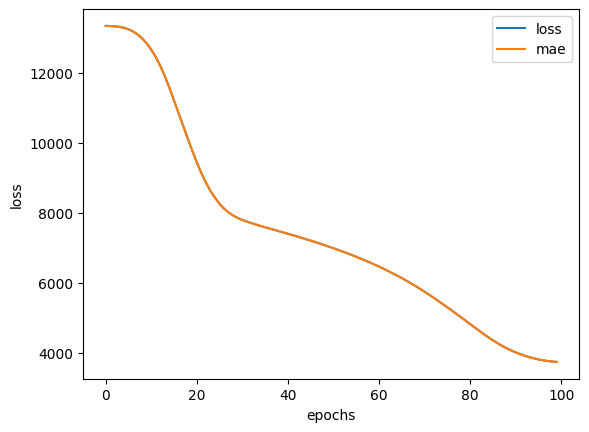

In [89]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [91]:
insurance_model_normalizer.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 12ms/step - loss: 3579.8235 - mae: 3579.8235


[3579.823486328125, 3579.823486328125]

## Learning - Neural Network Learns faster on the data which is normalized or standardized...